<a href="https://colab.research.google.com/github/singhbhupender1/ML-notebooks/blob/master/use_pretrianed_VGG_model_for_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Develop a Simple Photo Classifier

##1. Get a Sample Image

In [0]:
url = 'https://3qeqpr26caki16dnhd19sv6by6v-wpengine.netdna-ssl.com/wp-content/uploads/2017/08/Coffee-Mug.jpg'

##2. Load the VGG Model



```
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
```



##3. Load and Prepare Image
**Next, we can load the image as pixel data and prepare it to be presented to the network.**

**Keras provides some tools to help with this step.**

**First, we can use the load_img() function to load the image and resize it to the required size of 224×224 pixels.**



```
from keras.preprocessing.image import load_img
# load an image from file
image = load_img('mug.jpg', target_size=(224, 224))
```



**Next, we can convert the pixels to a NumPy array so that we can work with it in Keras. We can use the img_to_array() function for this.**



```
from keras.preprocessing.image import img_to_array
# convert the image pixels to a numpy array
image = img_to_array(image)
```



**The network expects one or more images as input; that means the input array will need to be 4-dimensional: samples, rows, columns, and channels.**

**We only have one sample (one image). We can reshape the array by calling reshape() and adding the extra dimension.**



```
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
```



**Next, the image pixels need to be prepared in the same way as the ImageNet training data was prepared. Specifically, from the paper:**

***The only preprocessing we do is subtracting the mean RGB value, computed on the training set, from each pixel.***

**Keras provides a function called preprocess_input() to prepare new input for the network.**



```
from keras.applications.vgg16 import preprocess_input
# prepare the image for the VGG model
image = preprocess_input(image)
```



##4. Make a Prediction

**We can call the predict() function on the model in order to get a prediction of the probability of the image belonging to each of the 1000 known object types.**



```
# predict the probability across all output classes
yhat = model.predict(image)
```



##5. Interpret Prediction

**Keras provides a function to interpret the probabilities called decode_predictions().**

**It can return a list of classes and their probabilities in case you would like to present the top 3 objects that may be in the photo.**

**We will just report the first most likely object.**



```
from keras.applications.vgg16 import decode_predictions
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))
```



In [22]:
#complete example
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
from urllib.request import urlopen
#load the model
model = VGG16()
#load the image
url
image = load_img(urlopen(url), target_size=(224, 224))
#covert the image to an array
image = img_to_array(image)
#reshape data to the model
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
#prepare the image to vgg model
image = preprocess_input(image)
#predict the probability across all output classes
yhat = model.predict(image)
#convert the probability to class lables
label = decode_predictions(yhat)
#retrieve the most likely result, e.g. highest probability
label = label[0] [0]
#print the classification
print('%s: %.2f%%' % (label[1], label[2] *100))


coffee_mug: 75.27%


Using TensorFlow backend.


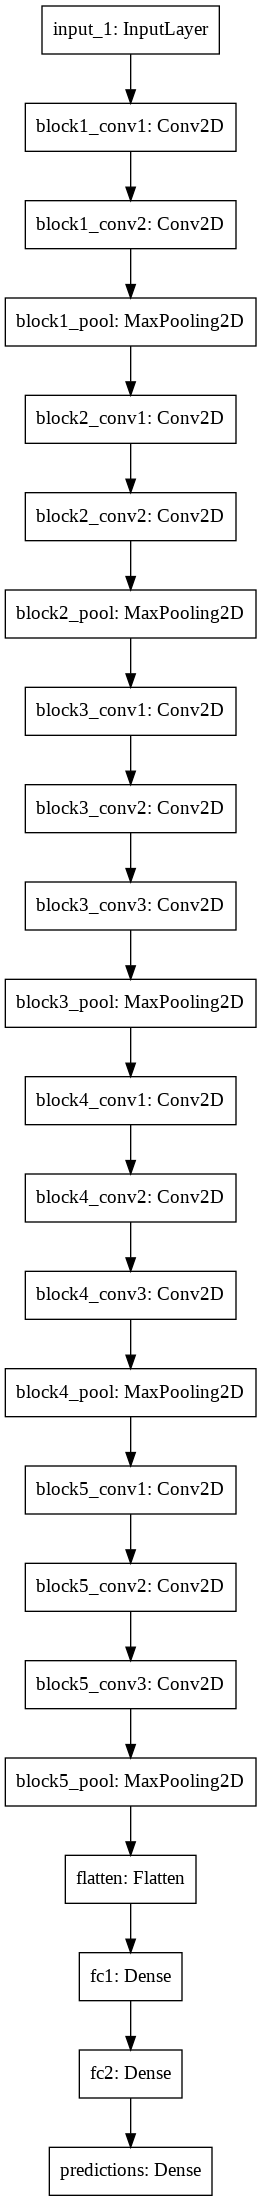

In [1]:
from keras.applications.vgg16 import VGG16
from keras.utils.vis_utils import plot_model
model = VGG16()
plot_model(model, to_file='vgg.png')